### From [Wes McKinney](https://www.youtube.com/watch?v=0unf-C-pBYE)

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
from datetime import datetime
pd.__version__

u'0.18.0'

## Resampling

In [2]:
rng = pd.date_range(datetime.now(), periods=1000, freq='t')
rng

DatetimeIndex(['2016-10-07 12:02:32.849000', '2016-10-07 12:03:32.849000',
               '2016-10-07 12:04:32.849000', '2016-10-07 12:05:32.849000',
               '2016-10-07 12:06:32.849000', '2016-10-07 12:07:32.849000',
               '2016-10-07 12:08:32.849000', '2016-10-07 12:09:32.849000',
               '2016-10-07 12:10:32.849000', '2016-10-07 12:11:32.849000',
               ...
               '2016-10-08 04:32:32.849000', '2016-10-08 04:33:32.849000',
               '2016-10-08 04:34:32.849000', '2016-10-08 04:35:32.849000',
               '2016-10-08 04:36:32.849000', '2016-10-08 04:37:32.849000',
               '2016-10-08 04:38:32.849000', '2016-10-08 04:39:32.849000',
               '2016-10-08 04:40:32.849000', '2016-10-08 04:41:32.849000'],
              dtype='datetime64[ns]', length=1000, freq='T')

In [3]:
from numpy.random import randn
ts = Series(randn(1000), index=rng)
ts.head()

2016-10-07 12:02:32.849    0.480353
2016-10-07 12:03:32.849    0.454973
2016-10-07 12:04:32.849    1.295102
2016-10-07 12:05:32.849    0.483538
2016-10-07 12:06:32.849    1.860515
Freq: T, dtype: float64

### High freq to low: downsampling

In [4]:
ts.resample('100t').count()

2016-10-07 11:40:00     78
2016-10-07 13:20:00    100
2016-10-07 15:00:00    100
2016-10-07 16:40:00    100
2016-10-07 18:20:00    100
2016-10-07 20:00:00    100
2016-10-07 21:40:00    100
2016-10-07 23:20:00    100
2016-10-08 01:00:00    100
2016-10-08 02:40:00    100
2016-10-08 04:20:00     22
Freq: 100T, dtype: int64

In [5]:
ts.resample('100t').mean()

2016-10-07 11:40:00    0.110830
2016-10-07 13:20:00    0.006760
2016-10-07 15:00:00   -0.019346
2016-10-07 16:40:00    0.033242
2016-10-07 18:20:00    0.030442
2016-10-07 20:00:00    0.013876
2016-10-07 21:40:00   -0.028937
2016-10-07 23:20:00   -0.106156
2016-10-08 01:00:00    0.241922
2016-10-08 02:40:00   -0.131567
2016-10-08 04:20:00    0.192660
Freq: 100T, dtype: float64

In [6]:
ts.resample('D').count()

2016-10-07    718
2016-10-08    282
Freq: D, dtype: int64

In [7]:
ts.resample('500t').apply(['count','mean','max', 'median','min','first','last'])

,count,mean,max,median,min,first,last
2016-10-07 08:20:00,278,0.026569,3.130346,-0.002883,-2.735288,0.480353,-0.195078
2016-10-07 16:40:00,500,-0.011507,3.655219,-0.036402,-2.998571,0.278035,1.435301
2016-10-08 01:00:00,222,0.068802,2.475483,0.054517,-3.187944,0.512251,2.190090


In [8]:
resampled = ts.resample('200t').apply(['count','mean','max', 'median','min','first','last'])
resampled

,count,mean,max,median,min,first,last
2016-10-07 10:00:00,78,0.110830,2.654980,0.181535,-2.735288,0.480353,0.511284
2016-10-07 13:20:00,200,-0.006293,3.130346,-0.037846,-2.725517,1.647862,-0.195078
2016-10-07 16:40:00,200,0.031842,3.655219,-0.013665,-2.461582,0.278035,-1.136203
2016-10-07 20:00:00,200,-0.007530,3.157019,-0.071933,-2.975903,-0.254996,1.354101
2016-10-07 23:20:00,200,0.067883,2.638552,0.084181,-2.998571,-0.110185,-0.493481
2016-10-08 02:40:00,122,-0.073100,2.190090,-0.024017,-3.187944,-0.319069,2.190090


In [9]:
#to high frequency
hf = resampled.resample('50t').mean()
hf.head()

,count,mean,max,median,min,first,last
2016-10-07 10:00:00,78.0,0.110830,2.654980,0.181535,-2.735288,0.480353,0.511284
2016-10-07 10:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 11:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 12:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10-07 13:20:00,200.0,-0.006293,3.130346,-0.037846,-2.725517,1.647862,-0.195078


In [10]:
hf.fillna(0).head() #(method='ffill')  # forward fill , bfill backword fill

,count,mean,max,median,min,first,last
2016-10-07 10:00:00,78.0,0.110830,2.654980,0.181535,-2.735288,0.480353,0.511284
2016-10-07 10:50:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-07 11:40:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-07 12:30:00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10-07 13:20:00,200.0,-0.006293,3.130346,-0.037846,-2.725517,1.647862,-0.195078


In [11]:
resampled = ts.resample('500t').apply(['first', 'max', 'min','last'])
hf = resampled.resample('100t').mean()
hf

,first,max,min,last
2016-10-07 08:20:00,0.480353,3.130346,-2.735288,-0.195078
2016-10-07 10:00:00,NaN,NaN,NaN,NaN
2016-10-07 11:40:00,NaN,NaN,NaN,NaN
2016-10-07 13:20:00,NaN,NaN,NaN,NaN
2016-10-07 15:00:00,NaN,NaN,NaN,NaN
2016-10-07 16:40:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 18:20:00,NaN,NaN,NaN,NaN
2016-10-07 20:00:00,NaN,NaN,NaN,NaN
2016-10-07 21:40:00,NaN,NaN,NaN,NaN
2016-10-07 23:20:00,NaN,NaN,NaN,NaN


In [12]:
# limit how many rows to be filled
limits ={'first':1, 'max':2, 'min':3, 'last':4}
hf.apply(lambda x: x.fillna(method='ffill', limit=limits[x.name]))  

,first,max,min,last
2016-10-07 08:20:00,0.480353,3.130346,-2.735288,-0.195078
2016-10-07 10:00:00,0.480353,3.130346,-2.735288,-0.195078
2016-10-07 11:40:00,NaN,3.130346,-2.735288,-0.195078
2016-10-07 13:20:00,NaN,NaN,-2.735288,-0.195078
2016-10-07 15:00:00,NaN,NaN,NaN,-0.195078
2016-10-07 16:40:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 18:20:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 20:00:00,NaN,3.655219,-2.998571,1.435301
2016-10-07 21:40:00,NaN,NaN,-2.998571,1.435301
2016-10-07 23:20:00,NaN,NaN,NaN,1.435301


In [13]:
resampled.resample('100t').bfill()  # fill backword

,first,max,min,last
2016-10-07 08:20:00,0.480353,3.130346,-2.735288,-0.195078
2016-10-07 10:00:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 11:40:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 13:20:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 15:00:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 16:40:00,0.278035,3.655219,-2.998571,1.435301
2016-10-07 18:20:00,0.512251,2.475483,-3.187944,2.190090
2016-10-07 20:00:00,0.512251,2.475483,-3.187944,2.190090
2016-10-07 21:40:00,0.512251,2.475483,-3.187944,2.190090
2016-10-07 23:20:00,0.512251,2.475483,-3.187944,2.190090


## Periods

In [14]:
pd.Period

pandas._period.Period

In [15]:
p =  pd.Period('2016', freq='A-JUN')
p

Period('2016', 'A-JUN')

In [16]:
tsp = ts.resample('M', kind='period').mean()
tsp

2016-10    0.016907
Freq: M, dtype: float64

## Load data

Credit to [UCI ML]('https://archive.ics.uci.edu/ml/datasets/Air+Quality')

In [17]:
aq = pd.read_excel('AirQualityUCI.xlsx')

In [18]:
aq.to_csv('AirQualityUCI.csv')

In [19]:
df = pd.read_csv('AirQualityUCI.csv', parse_dates=[['Date', 'Time']])
df.head()

,Date_Time,Unnamed: 0,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,0,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,3,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,4,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date_Time        9357 non-null datetime64[ns]
Unnamed: 0       9357 non-null int64
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(2)
memory usage: 1.1 MB


In [21]:
del df['Unnamed: 0']

In [22]:
df.head()

,Date_Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [27]:
# interchange to day, month, quarter, year
df1 = df
df1['Date_Time'].dt.quarter[:3]

0    1
1    1
2    1
Name: Date_Time, dtype: int64

In [29]:
df1['Date_Time'].dt.year[50:53]

50    2004
51    2004
52    2004
Name: Date_Time, dtype: int64

In [30]:
index= pd.PeriodIndex(year=df1['Date_Time'].dt.year,quarter = df1['Date_Time'].dt.quarter)
index

PeriodIndex(['2004Q1', '2004Q1', '2004Q1', '2004Q1', '2004Q1', '2004Q1',
             '2004Q1', '2004Q1', '2004Q1', '2004Q1',
             ...
             '2005Q2', '2005Q2', '2005Q2', '2005Q2', '2005Q2', '2005Q2',
             '2005Q2', '2005Q2', '2005Q2', '2005Q2'],
            dtype='int64', length=9357, freq='Q-DEC')

In [35]:
df1.index= index
df1.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 9357 entries, 2004Q1 to 2005Q2
Freq: Q-DEC
Data columns (total 14 columns):
Date_Time        9357 non-null datetime64[ns]
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1.1 MB


In [37]:
df1 = df1.drop(['Date_Time'], axis=1)  #axis = 1 represents column
df1.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004Q1,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
2004Q1,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2004Q1,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
2004Q1,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
2004Q1,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [43]:
from matplotlib import pyplot as plt
%matplotlib inline

In [61]:
df2 = df1.groupby(df1.index).mean()
df2.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
2004Q1,-4.847647,1222.685784,96.554902,9.935104,935.540686,128.676471,1029.058987,89.529412,1571.943301,1027.379902,14.390114,50.169559,0.789412
2004Q2,-39.875229,1040.264232,-93.978480,2.786615,913.505800,59.629579,887.419643,33.586996,1576.771100,914.285027,13.141579,35.851858,-6.224013
2004Q3,-54.615082,998.513776,-200.000000,3.281721,900.407005,64.723279,785.317255,21.160326,1536.256265,902.555895,20.737172,32.477027,-4.822821
2004Q4,-42.819293,1087.375377,-200.000000,4.150911,953.638700,254.155797,747.234073,38.293931,1356.832880,1091.741093,7.305933,50.212262,-6.303038
2005Q1,-6.984907,1032.482716,-200.000000,-4.852200,806.887346,306.674306,700.259838,131.582778,1065.159838,991.752585,-3.670914,36.989240,-12.165275


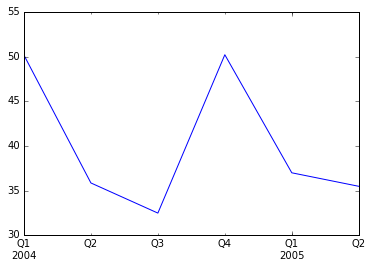

In [62]:
df2.RH.plot()

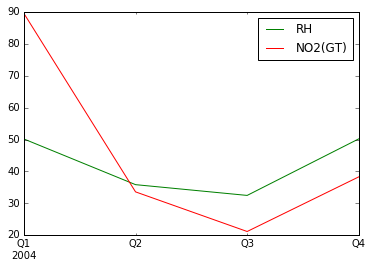

In [72]:
# show only 2004 data
df2.RH['2004'].plot(style='g')
df2['NO2(GT)']['2004'].plot(style='r')
plt.legend(['RH', 'NO2(GT)'])

df.index

In [81]:
df = pd.read_csv('AirQualityUCI.csv')
df = df.drop(['Time', 'Unnamed: 0'], axis=1)
df.head()

,Date,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [86]:
df1= df.groupby('Date').mean()
df1.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date,,,,,,,,,,,,,
2004-03-10,1.966667,1316.500000,86.500000,8.460790,912.250000,132.000000,1167.250000,108.833333,1545.333333,1096.041667,12.020833,54.883334,0.765626
2004-03-11,-6.187500,1244.062500,104.500000,7.989058,851.802083,130.041667,1277.187500,87.375000,1522.697917,885.031250,9.833333,64.069791,0.775768
2004-03-12,-14.095833,1281.562500,141.500000,12.129509,1008.229167,142.583333,1101.718750,89.916667,1627.218750,1084.218750,11.292708,51.107292,0.663102
2004-03-13,-5.750000,1330.555556,139.250000,10.922887,992.822917,168.416667,993.159722,105.583333,1595.621528,1245.781250,12.866319,51.530903,0.732294
2004-03-14,-5.966667,1360.927083,116.958333,9.631442,943.854167,132.166667,1001.104167,97.458333,1602.187500,1234.177083,16.016667,48.843750,0.849674


In [115]:
# get RH
rh = df1['RH']
rh.head()

Date
2004-03-10    54.883334
2004-03-11    64.069791
2004-03-12    51.107292
2004-03-13    51.530903
2004-03-14    48.843750
Name: RH, dtype: float64

In [116]:
# sort the index
rh = rh.sort_index(ascending=True)  # very import
rh.tail()

Date
2005-03-31    50.092708
2005-04-01    35.959722
2005-04-02    32.213542
2005-04-03    33.686458
2005-04-04    42.791667
Name: RH, dtype: float64

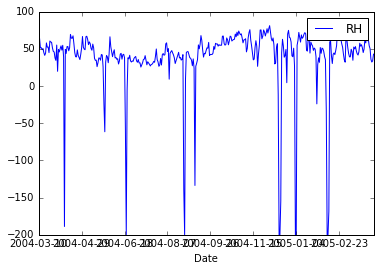

In [117]:
# plot the data and show the graph
rh.plot(label='RH')
plt.legend()
plt.show()

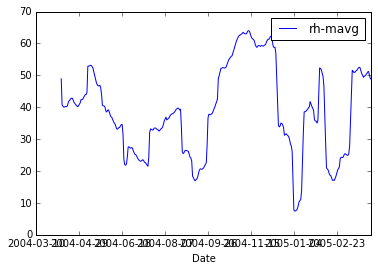

In [118]:
# moving average analysis
mavg = rh.rolling(window=30).mean()

mavg.plot(label='rh-mavg')
plt.legend()
plt.show()

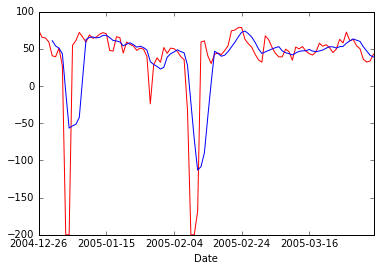

In [128]:
rh100 = rh.tail(100)
mavg = rh100.rolling(window=5).mean()
rh100.plot(label='rh', style='r')
mavg.plot(label='rh-mavg', style='b')

plt.show()

In [119]:
df1.shape

(391, 13)